In [ ]:
from sklearn.datasets import fetch_openml
import pandas as pd

boston = fetch_openml(name='boston', version=1)
data = pd.DataFrame(boston.data, columns=boston.feature_names)
data['PRICE'] = boston.target

print(data.head())

      CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0     15.3   
1  0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0     17.8   
2  0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0     17.8   
3  0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0     18.7   
4  0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0     18.7   

        B  LSTAT  PRICE  
0  396.90   4.98   24.0  
1  396.90   9.14   21.6  
2  392.83   4.03   34.7  
3  394.63   2.94   33.4  
4  396.90   5.33   36.2  


In [ ]:
# Standardizing numerical features

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_features = data.drop('PRICE', axis=1).columns
data[numerical_features] = scaler.fit_transform(data[numerical_features])

print(data.head())

       CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

        DIS       RAD       TAX   PTRATIO         B     LSTAT  PRICE  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562   24.0  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439   21.6  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727   34.7  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517   33.4  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501   36.2  


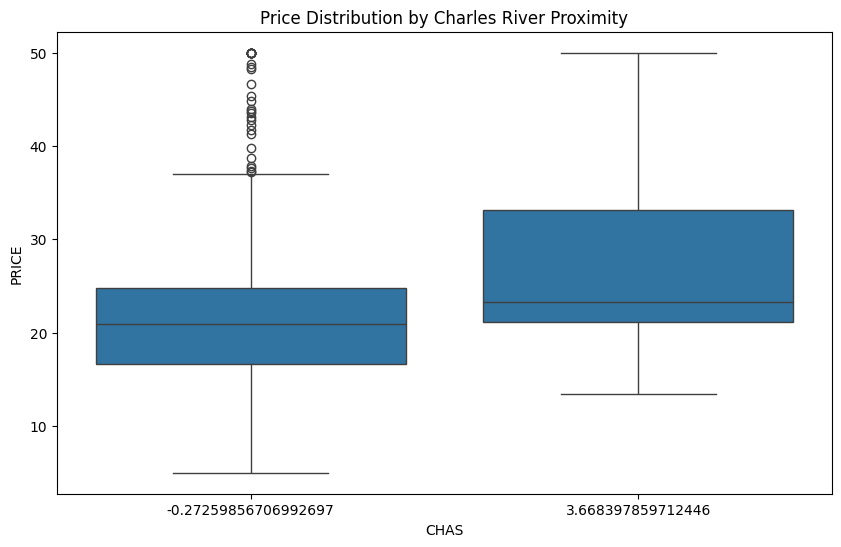

In [ ]:
# Boxplot of Price distribution by Charles River proximity (CHAS)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='CHAS', y='PRICE', data=data)
plt.title('Price Distribution by Charles River Proximity')
plt.show()

In [ ]:
# Model training (Random Forest Regressor)

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

x = data.drop('PRICE', axis=1)
y = data['PRICE']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

y_pred = rf_model.predict(x_test)

# Calculating R² score
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.2f}")


R² Score: 0.89
